# Supervised Learning Lab

# Introduction
In this lab session the aim is to get hands-on experience with a machine learning library for supervised
learning. We will solve both regression tasks and classification tasks. All examples in the handout are taken
from Matlab, but you are free to use any other machine learning library of your choice.
After completing the tasks, you should write a report in PDF that includes the results of all tasks. To
submit your solution, create a compressed file that includes your source code and the report, and upload the
compressed file to the Aula Global.
Students are free to use AI tools for the creation of ths report but in this case they must include a
detailed description of how they used the AI tools in their submission. Such details include (but not limited
to) which AI tools were used, with which prompts, how the AI generated content is used in the assignment,
etc. Note that while GPTs are great products of ML,these models can still generate incorrect answers (i.e.,
these models can hallucinate). Always use AI tools with caution.

# Overview
1. Regression
    - Task 1: Generate a number of smaller datasets
    - Task 2: Apply linear regression
    - Task 3: Plot the resulting error
    - Task 4: Quadratic non-linear transform
    - Task 5: Three most important features

# 1. Regression
The variables from left to right, are:
Density determined from underwater weighing Percent body fat from Siri’s (1956) equation Age (years)
Weight (lbs) Height (inches) Neck circumference (cm) Chest circumference (cm) Abdomen 2 circumference
(cm) Hip circumference (cm) Thigh circumference (cm) Knee circumference (cm) Ankle circumference (cm)
Biceps (extended) circumference (cm) Forearm circumference (cm) Wrist circumference (cm)

In [46]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint

# Models
from sklearn.linear_model import LinearRegression

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Evaluate
from sklearn.metrics import mean_squared_error

import warnings 
warnings.filterwarnings('ignore')

### Task 1: Generate a number of smaller datasets by randomly selecting 10, 20, . . . data points (xn, yn).

In [47]:
class dirs:
    home = 'C:/Users/obeyk/Desktop/UPF/Trimester 1/Data Science/Assignments/Supervised Learning'
    bodyfat = 'bodyfat.txt'

In [48]:
data = f'{dirs.home}/{dirs.bodyfat}'

In [49]:
col_names = ['density', 'bodyfat', 'age', 'weight', 'height', 
             'neck', 'chest', 'abs', 'hip', 'thigh', 
             'knee', 'ankle', 'biceps', 'forearm', 'wrist']

In [50]:
data = pd.read_csv(data, delimiter=' ', index_col=False, names=col_names)

In [51]:
# Define a function to remove the numbered prefixes
def remove_prefix(value):
    if isinstance(value, str):
        return value.split(':', 1)[-1]  # Split at the first ':' and take the right part
    else:
        return value

# Apply the function to each cell in the DataFrame
data = data.applymap(remove_prefix)
data.shape

(252, 15)

In [52]:
data.head()

,density,bodyfat,age,weight,height,neck,chest,abs,hip,thigh,knee,ankle,biceps,forearm,wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [53]:
# Convert dtype objects -> float64
for col in data.columns:
    data[col] = pd.to_numeric(data[col])

In [54]:
# Create function ot preprocess data
def preprocessing_inputs(df):
    df = df.copy()
    
    # Split DataFrame
    y = df['bodyfat']
    X = df.drop('bodyfat', axis=1)
    
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    X_train = scaler.fit(X_train).transform(X_train)
    X_test = scaler.fit(X_test).transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [55]:
# Datasets generated in next code block #

### Task 2: For each dataset, apply linear regression to obtain a linear hypothesis (i.e. weight vector) that minimizes the mean square error for all data points (a.k.a. empirical risk).

In [56]:
# Initialize lists to store results
total_avg_mse = []

# Run your model 5 times
for run in range(1,6):
    for i in range(1,101):
        sample_mse =[]
        # Randomly select ~176 data points from dataset 
        df = data.sample(frac=0.7, random_state=randint(1,100)) 
    
        # Preprocess 
        X_train, X_test, y_train, y_test = preprocessing_inputs(df)

        # Train
        linreg = LinearRegression()
        linreg.fit(X_train, y_train)

        # Predict
        yhat = linreg.predict(X_test)
        lin_mse = np.mean((yhat - y_test) ** 2)

        # Evaluate
        sample_mse.append(lin_mse)

        # Calculate the average MSE for this sample
        avg_mse = np.mean(sample_mse)
    
    total_avg_mse.append(avg_mse)

print(f'Average MSE for 100 samples with 70% of data retained, repeated 5 times: {np.mean(total_avg_mse)}')

Average MSE for 100 samples with 70% of data retained, repeated 5 times: 4.829156021149666


### Task 3: Plot the resulting error (the empirical risk) as a function of the number of data points. To get a better estimate it is a good idea to generate multiple datasets for each number of data points and take the average.

In [57]:
# Define a range of sample sizes
sample_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
num_datasets = len(sample_sizes)

In [58]:
# Initialize lists to store results
sample_sizes_list = []
avg_mse_list = []

In [59]:
for sample_size in sample_sizes:
    sample_mse = []  # List to store MSE for multiple datasets at this sample size
    for _ in range(num_datasets):
        df = data.sample(frac=sample_size, random_state=1000)
        X_train, X_test, y_train, y_test = preprocessing_inputs(df)

        linreg = LinearRegression()
        linreg.fit(X_train, y_train)

        yhat = linreg.predict(X_test)
        lin_mse = np.mean((yhat - y_test) ** 2)

        sample_mse.append(lin_mse)

    # Calculate the average MSE for this sample size
    avg_mse = np.mean(sample_mse)

    # Store the results in lists
    sample_sizes_list.append(sample_size)
    avg_mse_list.append(avg_mse)

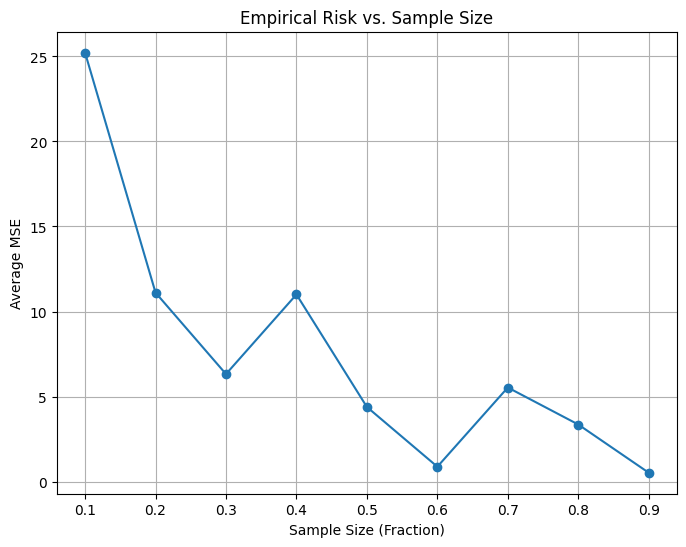

In [60]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(sample_sizes_list, avg_mse_list, marker='o')
plt.xlabel('Sample Size (Fraction)')
plt.ylabel('Average MSE')
plt.title('Empirical Risk vs. Sample Size')
plt.grid(True)
plt.show()

### Task 4: Repeat the process for a quadratic non-linear transform, and compare the result of the two approaches.

In [61]:
# Function to apply a quadratic nonlinear transformation to the feature matrix X
def apply_quadratic_transform(X):
    X_transformed = np.column_stack((X, X**2))
    return X_transformed

In [62]:
# Initialize lists to store results
sample_sizes_list = []
linear_avg_mse_list = []
quadratic_avg_mse_list = []

In [63]:
for sample_size in sample_sizes:
    linear_sample_mse = []  # List to store MSE for multiple datasets at this sample size
    quadratic_sample_mse = []  # List to store MSE for quadratic transformed data
    for _ in range(num_datasets):
        df = data.sample(frac=sample_size, random_state=1000)
        X_train, X_test, y_train, y_test = preprocessing_inputs(df)

        # Linear regression on original data
        linreg_linear = LinearRegression()
        linreg_linear.fit(X_train, y_train)
        yhat_linear = linreg_linear.predict(X_test)
        lin_mse_linear = np.mean((yhat_linear - y_test) ** 2)
        linear_sample_mse.append(lin_mse_linear)

        # Apply quadratic transform and perform linear regression
        X_train_quadratic = apply_quadratic_transform(X_train)
        X_test_quadratic = apply_quadratic_transform(X_test)
        linreg_quadratic = LinearRegression()
        linreg_quadratic.fit(X_train_quadratic, y_train)
        yhat_quadratic = linreg_quadratic.predict(X_test_quadratic)
        lin_mse_quadratic = np.mean((yhat_quadratic - y_test) ** 2)
        quadratic_sample_mse.append(lin_mse_quadratic)

    # Calculate the average MSE for both linear and quadratic models
    linear_avg_mse = np.mean(linear_sample_mse)
    quadratic_avg_mse = np.mean(quadratic_sample_mse)

    # Store the results
    sample_sizes_list.append(sample_size)
    linear_avg_mse_list.append(linear_avg_mse)
    quadratic_avg_mse_list.append(quadratic_avg_mse)

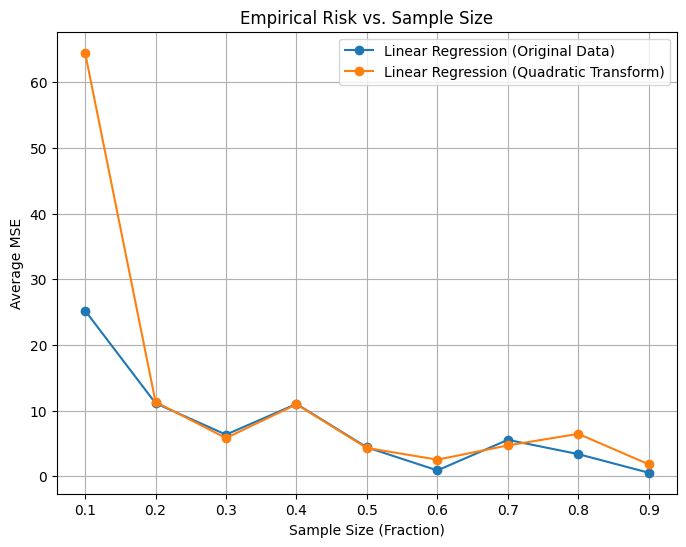

In [64]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(sample_sizes_list, linear_avg_mse_list, marker='o', label='Linear Regression (Original Data)')
plt.plot(sample_sizes_list, quadratic_avg_mse_list, marker='o', label='Linear Regression (Quadratic Transform)')
plt.xlabel('Sample Size (Fraction)')
plt.ylabel('Average MSE')
plt.title('Empirical Risk vs. Sample Size')
plt.legend()
plt.grid(True)
plt.show()

### Task 5: Which are the three most important features for the linear and quadratic model? How much is the performace drop if you only use them

In [65]:
# Preprocess 
X_train, X_test, y_train, y_test = preprocessing_inputs(data)

# Train and test the linear model with all features
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients for each variable in the linear model
linear_coefficients = model.coef_

In [66]:
# Identify the top 3 features for the linear model
top_feature_indices = np.argsort(np.abs(linear_coefficients))[::-1][:3]
top_feature_names = data.columns[top_feature_indices]

print("Top 3 Features for Linear Model:", list(top_feature_names))

Top 3 Features for Linear Model: ['density', 'abs', 'hip']


In [67]:
# Train and test the linear model with all features
linreg_linear_all_features = LinearRegression()
linreg_linear_all_features.fit(X_train, y_train)

yhat_linear_all_features = linreg_linear_all_features.predict(X_test)
mse_linear_all_features = mean_squared_error(y_test, yhat_linear_all_features)

In [68]:
# Train and test the quadratic model with all features
X_train_quadratic_all_features = apply_quadratic_transform(X_train)
X_test_quadratic_all_features = apply_quadratic_transform(X_test)

linreg_quadratic_all_features = LinearRegression()
linreg_quadratic_all_features.fit(X_train_quadratic_all_features, y_train)
yhat_quadratic_all_features = linreg_quadratic_all_features.predict(X_test_quadratic_all_features)
mse_quadratic_all_features = mean_squared_error(y_test, yhat_quadratic_all_features)

In [69]:
# Create new datasets with only the top 3 features
X_train_top_linear = X_train[:, top_feature_indices]
X_test_top_linear = X_test[:, top_feature_indices]

# Train and test the linear model with the top 3 features
linreg_linear_top_features = LinearRegression()
linreg_linear_top_features.fit(X_train_top_linear, y_train)
yhat_linear_top_features = linreg_linear_top_features.predict(X_test_top_linear)
mse_linear_top_features = mean_squared_error(y_test, yhat_linear_top_features)

# Apply quadratic transform to the top 3 features for the quadratic model
X_train_quadratic_top_features = apply_quadratic_transform(X_train_top_linear)
X_test_quadratic_top_features = apply_quadratic_transform(X_test_top_linear)

linreg_quadratic_top_features = LinearRegression()
linreg_quadratic_top_features.fit(X_train_quadratic_top_features, y_train)
yhat_quadratic_top_features = linreg_quadratic_top_features.predict(X_test_quadratic_top_features)
mse_quadratic_top_features = mean_squared_error(y_test, yhat_quadratic_top_features)

In [70]:
# Display the results for models with all features
print('   Linear Model - All Features MSE:', mse_linear_all_features)
print('Quadratic Model - All Features MSE:', mse_quadratic_all_features)
print('=========================================================')

# Display the results for models with only the top 3 features
print('   Linear Model - Top 3 Features MSE:', mse_linear_top_features)
print('Quadratic Model - Top 3 Features MSE:', mse_quadratic_top_features)

   Linear Model - All Features MSE: 5.498420144306041
Quadratic Model - All Features MSE: 5.4405075717605165
   Linear Model - Top 3 Features MSE: 5.472839361879788
Quadratic Model - Top 3 Features MSE: 5.234042874886772
